# MLM - Digit Recognizer - EDA

In [5]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [6]:
%pwd

'C:\\Users\\quinc\\Documents\\MLM25\\python_mlm25'

## Training dataset

In [47]:
# load training dataset
df_train = pd.read_csv('../digit-recognizer/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [9]:
df_train['label'].count()

42000

In [10]:
import math

In [11]:
math.sqrt(784)

28.0

In [82]:
train_counts = df_train['label'].value_counts().sort_index()
train_counts

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

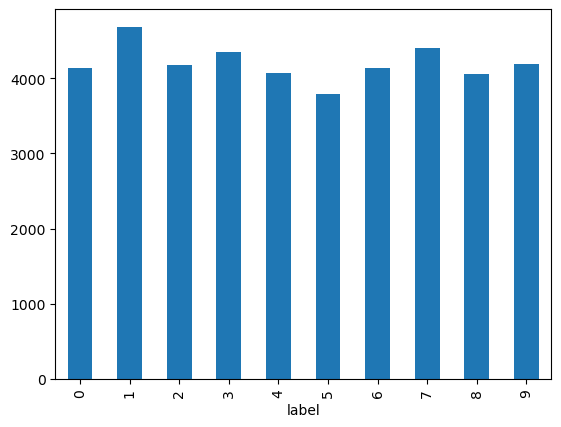

In [84]:
train_counts_bar = df_train['label'].value_counts().sort_index().plot(kind='bar')

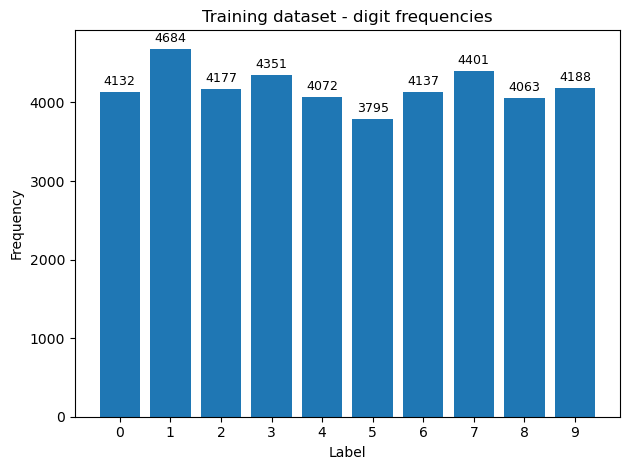

In [110]:
plt.bar(train_counts.index, train_counts.values)

#add values label
offset = train_counts.values.max()*0.01 # 1% of tallest bar

for i, value in enumerate(train_counts.values):
    plt.text(i, value + offset, str(value), ha='center', va='bottom', fontsize=9)

plt.xticks(train_counts.index)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Training dataset - digit frequencies')
plt.tight_layout()
plt.savefig("Train_digitfreq_bar.png", dpi=300, bbox_inches='tight')
plt.show()

In [128]:
#range of pixel values

#all rows, columns index 1 to end
pixel_columns = df_train.iloc[:, 1:]

#global min and max
pixel_min = pixel_columns.min().min()
pixel_max = pixel_columns.max().max()

print({pixel_min}, {pixel_max})

{0} {255}


## Test dataset

In [13]:
# load test dataset
df_test = pd.read_csv('../digit-recognizer/test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_test.count()

pixel0      28000
pixel1      28000
pixel2      28000
pixel3      28000
pixel4      28000
            ...  
pixel779    28000
pixel780    28000
pixel781    28000
pixel782    28000
pixel783    28000
Length: 784, dtype: int64

## visualising the images - training dataset

<function matplotlib.pyplot.show(close=None, block=None)>

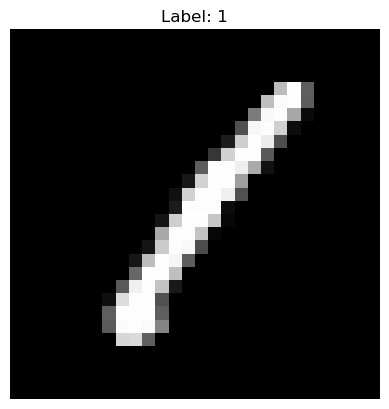

In [19]:
#pick row #1 (index 0)
row = df_train.iloc[0]

#pick label column in the chosen row
label = row['label']

#pick pixel columns in the chosen row (all columns except label column)
pixels = row.drop('label').values

#reshape to 28x28
image = pixels.reshape(28,28)

#plot image
plt.imshow(image, cmap="grey")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

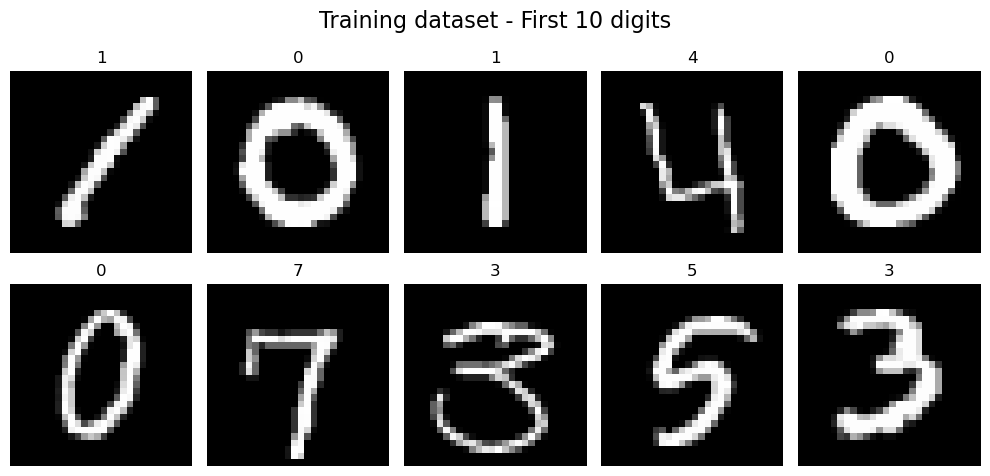

In [118]:
#multiple images in grid - first 10 digits
fig, axes = plt.subplots(2, 5, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    #pick row #1 (index i)
    row = df_train.iloc[i]
    
    #pick label column in the chosen row
    label = row['label']

    #pick pixel columns in the chosen row (all columns except label column)
    pixels = row.drop('label').values

    #reshape to 28x28
    image = pixels.reshape(28,28)

    #plot image
    ax.imshow(image, cmap="grey")
    ax.set_title(label)
    ax.axis("off")

fig.suptitle('Training dataset - First 10 digits', fontsize = 16)
plt.tight_layout()
plt.savefig("Train_10digits_visual.png", dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

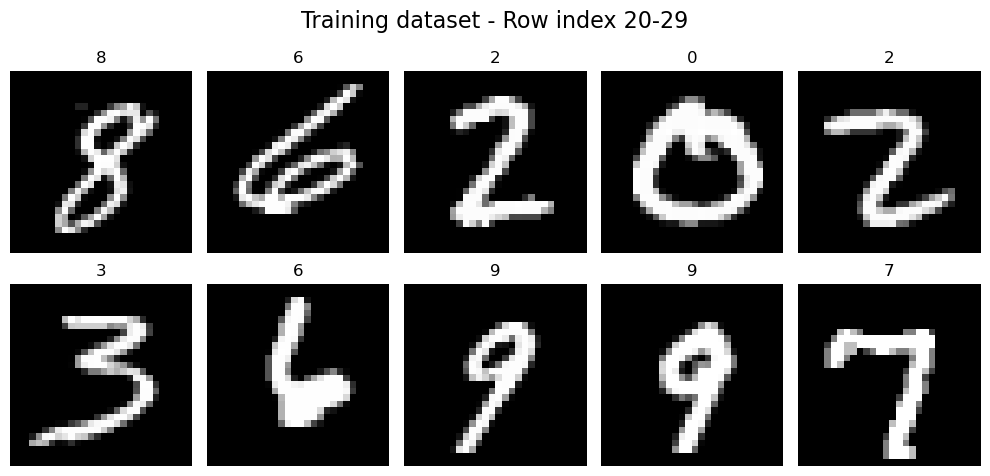

In [122]:
#multiple images in grid - digits 21-30
fig, axes = plt.subplots(2, 5, figsize=(10,5))

for i, ax in enumerate(axes.flat, start=20):
    #pick row #1 (index i)
    row = df_train.iloc[i]
    
    #pick label column in the chosen row
    label = row['label']

    #pick pixel columns in the chosen row (all columns except label column)
    pixels = row.drop('label').values

    #reshape to 28x28
    image = pixels.reshape(28,28)

    #plot image
    ax.imshow(image, cmap="grey")
    ax.set_title(label)
    ax.axis("off")

fig.suptitle('Training dataset - Row index 20-29', fontsize = 16)
plt.tight_layout()
plt.savefig("Train_row20-29_visual.png", dpi=300, bbox_inches='tight')
plt.show

## visualising the images - test dataset

<function matplotlib.pyplot.show(close=None, block=None)>

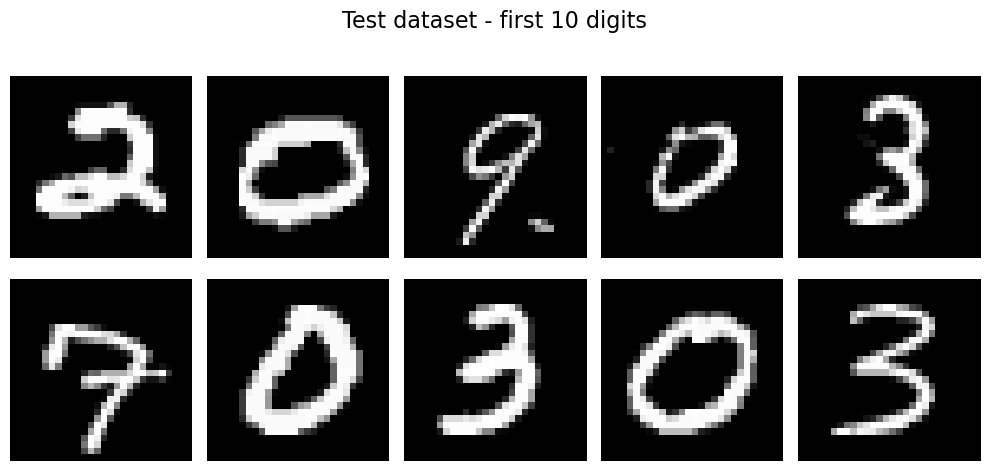

In [124]:
#multiple images in grid - first 10 digits
fig, axes = plt.subplots(2, 5, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    #pick row #1 (index i)
    row = df_test.iloc[i]

    #pick pixel columns in the chosen row (all columns except label column)
    pixels = row.values

    #reshape to 28x28
    image = pixels.reshape(28,28)

    #plot image
    ax.imshow(image, cmap="grey")
    ax.axis("off")

fig.suptitle('Test dataset - first 10 digits', fontsize = 16)
plt.tight_layout()
plt.savefig("Test_10digits_visual.png", dpi=300, bbox_inches='tight')
plt.show